# Individual Planning Report

GitHub Repository link: https://github.com/mcheng250/DSCI_project

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players_origin <- read_csv("https://raw.githubusercontent.com/mcheng250/DSCI_project/refs/heads/main/players.csv")
players_origin

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [3]:
players_tidy <- players_origin |> 
                    mutate(gender = as.factor(gender), experience = as.factor(experience)) 
# treat gender and experience as categorical
players_tidy

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [4]:
players_tidy |> summarize(mean_played_hours = round(mean(played_hours, na.rm = TRUE),2),
                            min_played_hours = round(min(played_hours, na.rm = TRUE),2),
                            max_played_hours = round(max(played_hours, na.rm = TRUE),2)
                           )
players_tidy |> summarize(mean_age = round(mean(Age, na.rm = TRUE),2),
                            min_age = round(min(Age, na.rm = TRUE),2),
                            max_age = round(max(Age, na.rm = TRUE),2)
                           )
players_tidy |> filter(subscribe == FALSE) |> summarize(subscribe_FALSE = n())
players_tidy |> filter(subscribe == TRUE) |> summarize(subscribe_TRUE = n())

mean_table <- players_tidy |> summarize(mean_played_hours = round(mean(played_hours, na.rm = TRUE),2),
                                        mean_age = round(mean(Age, na.rm = TRUE),2)) |>
                              pivot_longer(cols = everything(),
                                           names_to = "variable", 
                                           values_to = "mean_value")
mean_table

mean_played_hours,min_played_hours,max_played_hours
<dbl>,<dbl>,<dbl>
5.85,0,223.1


mean_age,min_age,max_age
<dbl>,<dbl>,<dbl>
21.14,9,58


subscribe_FALSE
<int>
52


subscribe_TRUE
<int>
144


variable,mean_value
<chr>,<dbl>
mean_played_hours,5.85
mean_age,21.14


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


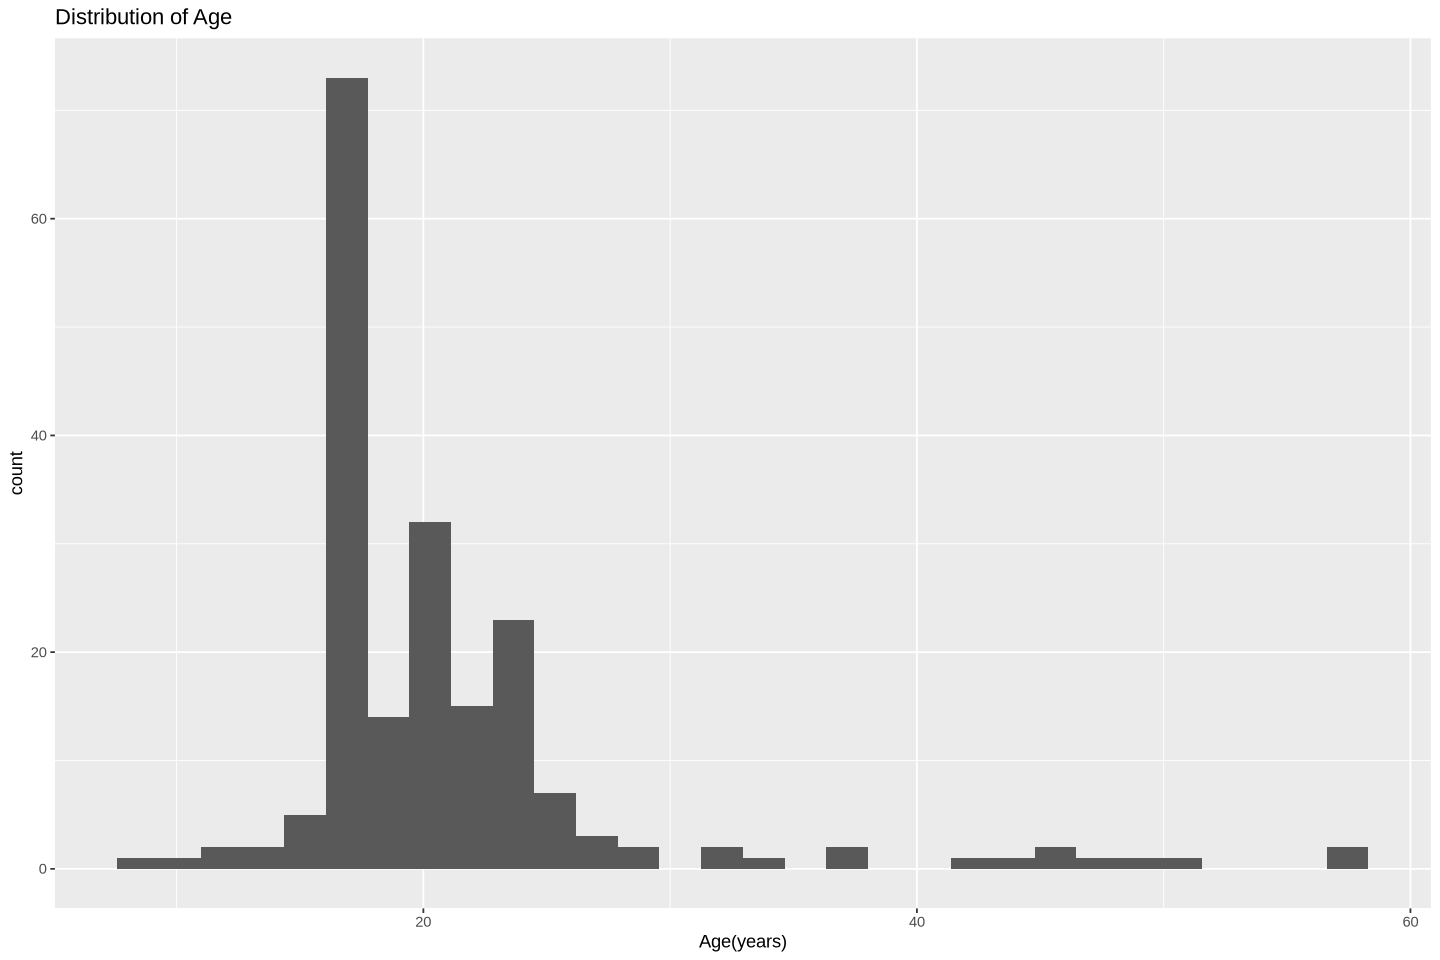

In [12]:
options(repr.plot.width = 12, repr.plot.height = 8) 
age_plot <- players_tidy |>
                ggplot(aes(x=Age)) +
                geom_histogram(bins = 30) +
                labs(title = "Distribution of Age", x = "Age(years)", y = "count")
age_plot

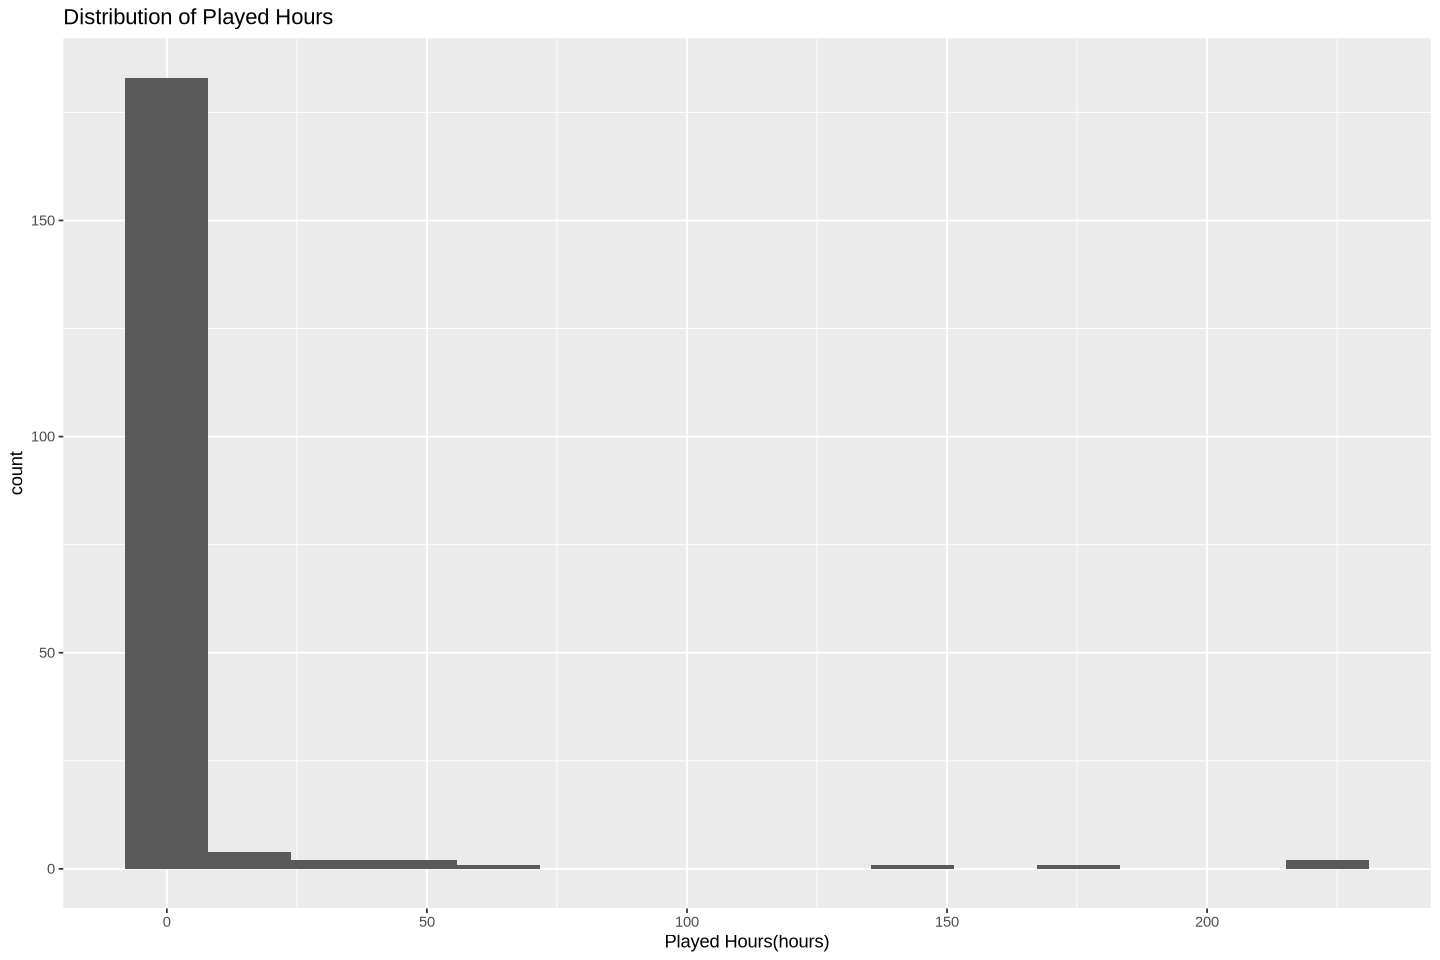

In [19]:
options(repr.plot.width = 12, repr.plot.height = 8) 
playered_hours_plot <- players_tidy |>
                ggplot(aes(x=played_hours)) +
                geom_histogram(bins = 15) +
                labs(title = "Distribution of Played Hours", x = "Played Hours(hours)", y = "count")
playered_hours_plot

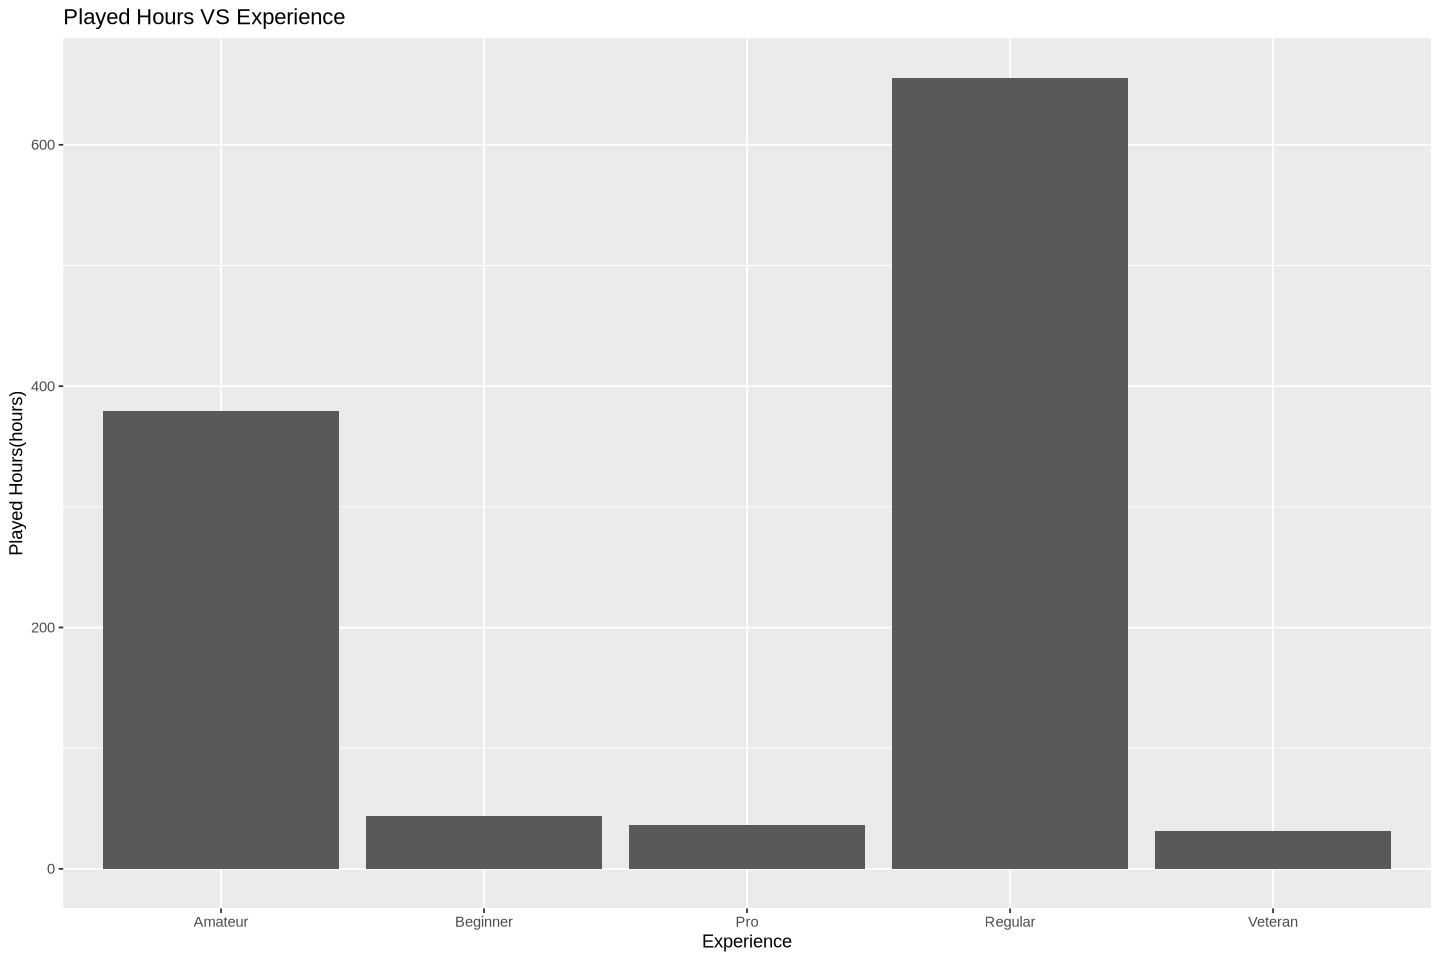

In [28]:
options(repr.plot.width = 12, repr.plot.height = 8) 
exp_vs_playered_hours <- players_tidy |>
                ggplot(aes(x=experience, y=played_hours)) +
                geom_bar(stat = "identity") +
                labs(title = "Experience VS Played Hours", x = "Experience", y = "Played Hours(hours)")
exp_vs_playered_hours

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


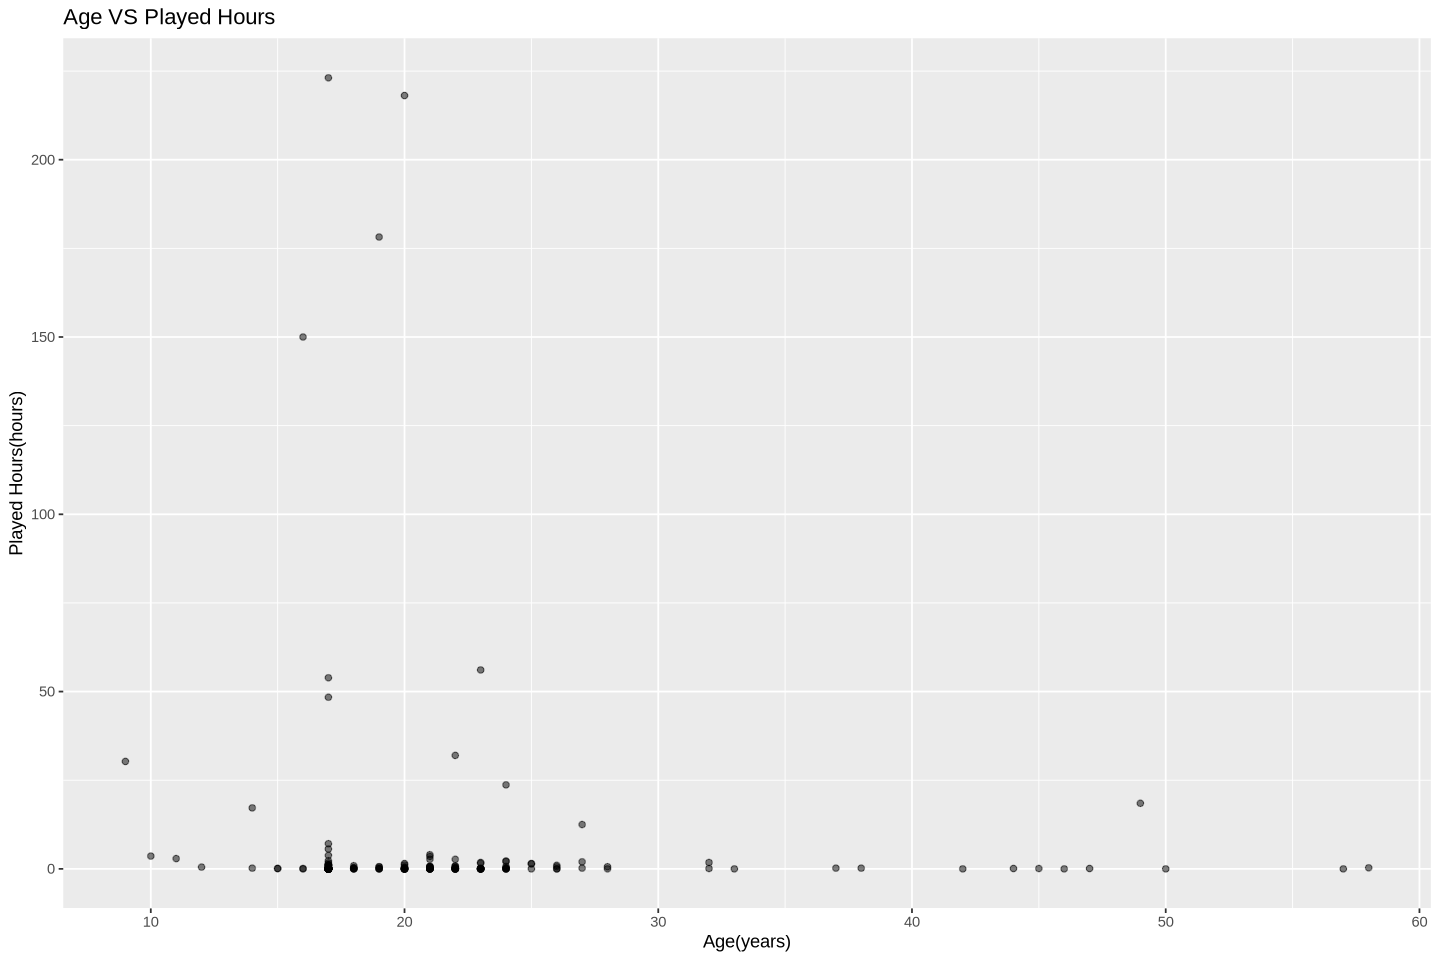

In [33]:
options(repr.plot.width = 12, repr.plot.height = 8) 
age_vs_played_hours <- players_tidy |>
                ggplot(aes(x=Age, y=played_hours)) +
                geom_point(alpha = 0.5) +
                labs(title = "Age VS Played Hours", x = "Age(years)", y = "Played Hours(hours)")
age_vs_played_hours

# Insight from plots
* Clearly player ranging from age 15 to 27 played this game more often, especially between 15 and 20.
* Most player only played less than one hour
* people with amateur and regular experience have the most played hours, while Pro and Veteran have the least, indicating the form of the games is not interesting enough to attract Pro players.

# Data Description-players.csv:

* Observations: 196
  
* summary statistics:
    * played_hours:
        * mean = 5.85
        * min = 0
        * max = 223.1
    * Age:
        * mean = 21.14
        * min = 9
        * max = 58
* Number of variables: 7

* Variable names & types & meanings:
    * experience(character--Categorical, Explanatory): Player’s self-assessed Minecraft experience level
    * subscribe(logical, Response & Explanatory): Whether the player subscribe the newsletter
    * hashedEmail(character, Identifier): The player's email, used to link player's profile data to sessions.
    * played_hours(double--Numeric, Explanatory & Response): Player’s cumulative play time
    * name(character, Identifier): Player’s display name
    * gender(character--Categorical, Explanatory): Player’s gender
    * Age(double--Numeric, Explanatory): Player's age
      
* any issues you see in the data:
    * There are two NA cells in the Age column.
    * could use some wrangling to make the dataset more organized, order the ascending age or play hours order.
      
* any other potential issues related to things you cannot directly see:
    * One person could have mutiple accounts since they are using using email to log in, which causes playing hours split.
    * There's an inbalance in subscribe column, with FALSE = 52 and TRUE = 144, which could affect the prediction stage.
      
* how the data were collected: The whole game project was running on Minecraft server, when the player tried to log in and play the game, they were asked to provide their information like experience, name gender, age and email, the email got transformed into hashedEmail in the dataset, which was used to connect to the sessions dataset to get the played_hours variable. And players were also asked whether they wanted to receive newsletter, which results in the subscribe variable.

In [5]:
sessions_origin <- read_csv("https://raw.githubusercontent.com/mcheng250/DSCI_project/refs/heads/main/sessions.csv")
sessions_origin

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


* Observations: 1535

* Number of variables: 5

* Variable names & types & meanings:
    * hashedEmail(character, Identifier): The player's email(user ID), used to link sessions to player's profile
    * start_time(character): Human-readable game log in time
    * end_time(character): Human-readable game log out time
    * original_start_time(double, Numeric): raw system game log in time
    * original_end_time(double, Numeric): raw system game log out time


* how the data were collected: every time the player log in, record the start time, and when they log out, record end time.

# Questions:
I will address Question 2, 

# Methods and Plan: